In [1]:
#Importing libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O 
import os
import itertools
import warnings
warnings.filterwarnings("ignore")
import io

################# visualization #################
import matplotlib.pyplot as plt 
from PIL import  Image
import seaborn as sns 
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff

In [2]:
import pandas as pd
Data = pd.read_csv (r"D:\Mahesh\IMARTICUS\Machine Learning with python\Logistic regression\water_potability.csv")

#first few rows
Data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,not potable
1,3.716080,129.422921,18630.05786,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,not potable
2,8.099124,224.236259,19909.54173,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,not potable
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,not potable
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,not potable


In [3]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   object 
dtypes: float64(9), object(1)
memory usage: 256.1+ KB


In [4]:
Data.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [5]:
for column in ['ph','Sulfate','Trihalomethanes']:
    Data[column].fillna(Data[column].median(), inplace=True)

In [6]:
Data.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

<AxesSubplot:xlabel='ph'>

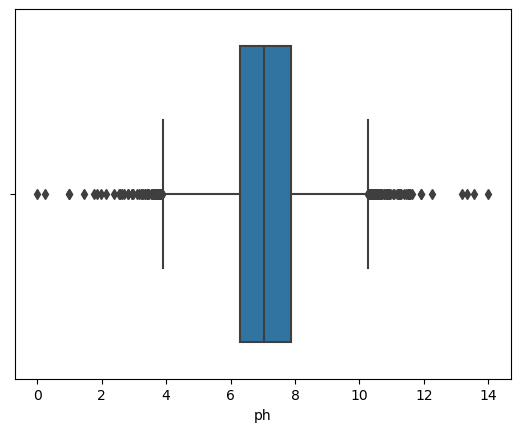

In [7]:
sns.boxplot(Data.ph)

In [8]:
q1 = Data['ph'].quantile(0.25)
q3 = Data['ph'].quantile(0.75)
iqr = q3-q1 #Interquartile range
low_limit = q1-1.5*iqr #acceptable range
upper_limit = q3+1.5*iqr #acceptable range


In [9]:
Data['ph']=np.where(Data['ph'] > upper_limit,upper_limit,Data['ph']) # upper limit

In [10]:
Data['ph']=np.where(Data['ph'] < low_limit,low_limit,Data['ph']) # low_limit

<AxesSubplot:xlabel='ph'>

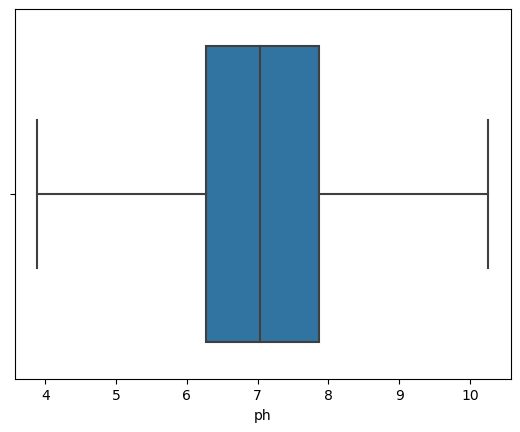

In [11]:
sns.boxplot(Data.ph)

<AxesSubplot:xlabel='Hardness'>

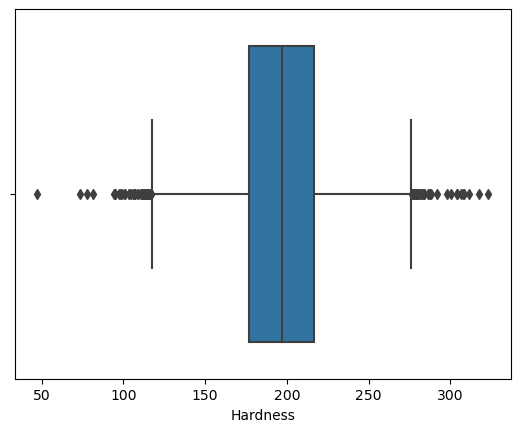

In [12]:
sns.boxplot(Data.Hardness)

In [13]:
q1 = Data['Hardness'].quantile(0.25)
q3 = Data['Hardness'].quantile(0.75)
iqr = q3-q1 #Interquartile range
low_limit = q1-1.5*iqr #acceptable range
upper_limit = q3+1.5*iqr #acceptable range

In [14]:
Data['Hardness']=np.where(Data['Hardness'] > upper_limit,upper_limit,Data['Hardness']) # upper limit

In [15]:
Data['Hardness']=np.where(Data['Hardness'] < low_limit,low_limit,Data['Hardness']) # low_limit

<AxesSubplot:xlabel='Hardness'>

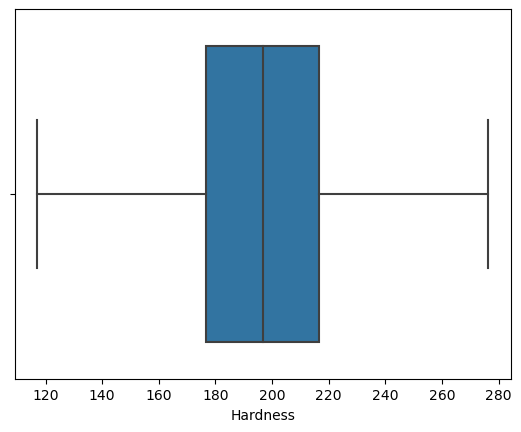

In [16]:
sns.boxplot(Data.Hardness)

<AxesSubplot:xlabel='Solids'>

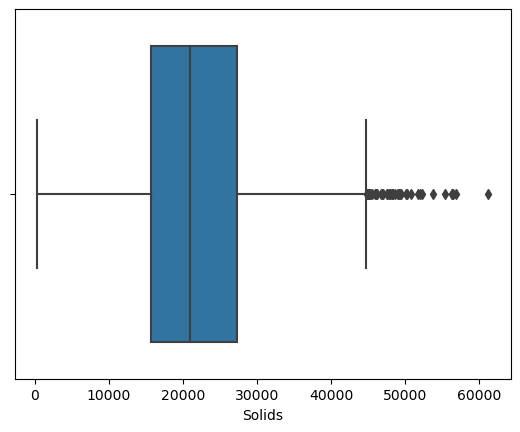

In [17]:
sns.boxplot(Data.Solids)

In [18]:
q1 = Data['Solids'].quantile(0.25)
q3 = Data['Solids'].quantile(0.75)
iqr = q3-q1 #Interquartile range
#low_limit = q1-1.5*iqr #acceptable range
upper_limit = q3+1.5*iqr #acceptable range

In [19]:
Data['Solids']=np.where(Data['Solids'] > upper_limit,upper_limit,Data['Solids']) # upper limit

<AxesSubplot:xlabel='Solids'>

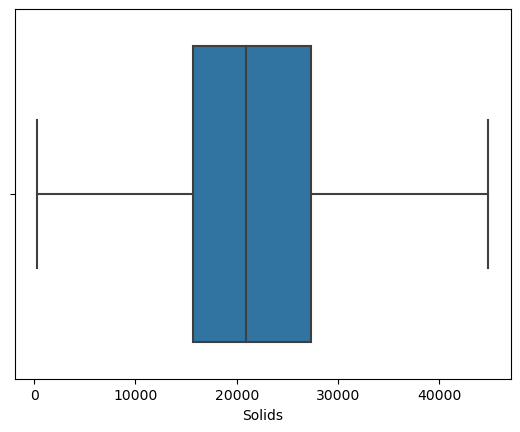

In [20]:
sns.boxplot(Data.Solids)

<AxesSubplot:xlabel='Chloramines'>

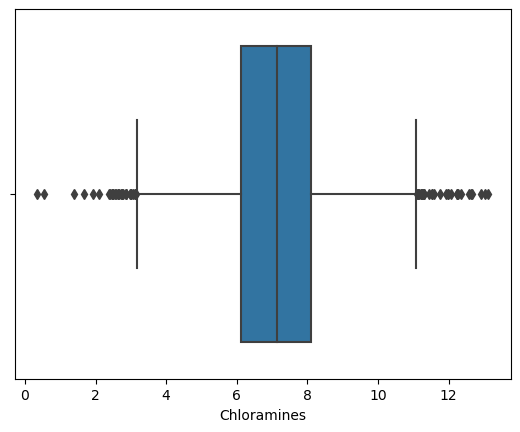

In [21]:
sns.boxplot(Data.Chloramines)

In [22]:
q1 = Data['Chloramines'].quantile(0.25)
q3 = Data['Chloramines'].quantile(0.75)
iqr = q3-q1 #Interquartile range
low_limit = q1-1.5*iqr #acceptable range
upper_limit = q3+1.5*iqr #acceptable range

In [23]:
Data['Chloramines']=np.where(Data['Chloramines'] > upper_limit,upper_limit,Data['Chloramines']) # upper limit

In [24]:
Data['Chloramines']=np.where(Data['Chloramines'] < low_limit,low_limit,Data['Chloramines']) # low_limit

<AxesSubplot:xlabel='Chloramines'>

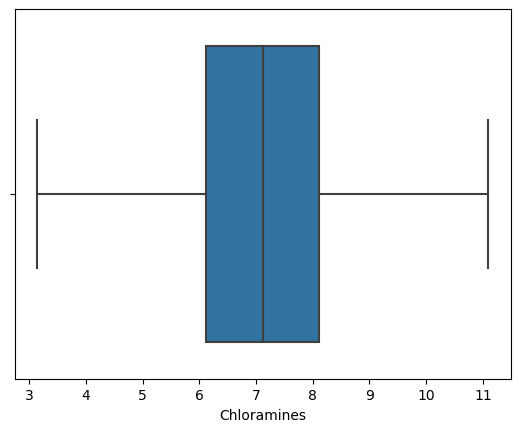

In [25]:
sns.boxplot(Data.Chloramines)

<AxesSubplot:xlabel='Sulfate'>

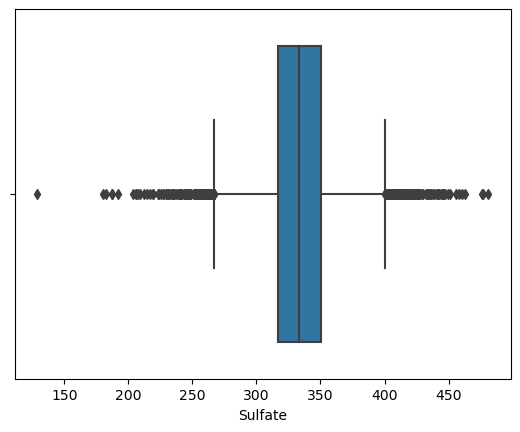

In [26]:
sns.boxplot(Data.Sulfate)

In [27]:
q1 = Data['Sulfate'].quantile(0.25)
q3 = Data['Sulfate'].quantile(0.75)
iqr = q3-q1 #Interquartile range
low_limit = q1-1.5*iqr #acceptable range
upper_limit = q3+1.5*iqr #acceptable range

In [28]:
Data['Sulfate']=np.where(Data['Sulfate'] > upper_limit,upper_limit,Data['Sulfate']) # upper limit

In [29]:
Data['Sulfate']=np.where(Data['Sulfate'] < low_limit,low_limit,Data['Sulfate']) # low_limit

<AxesSubplot:xlabel='Sulfate'>

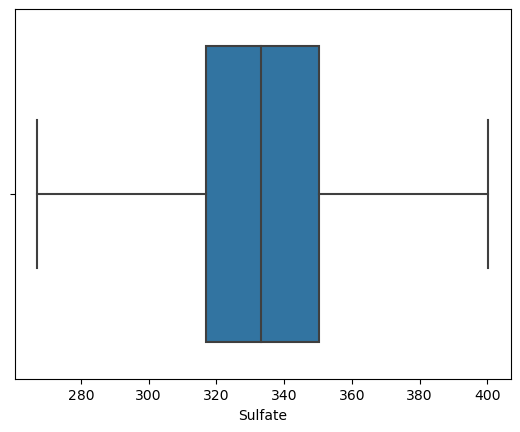

In [30]:
sns.boxplot(Data.Sulfate)

<AxesSubplot:xlabel='Conductivity'>

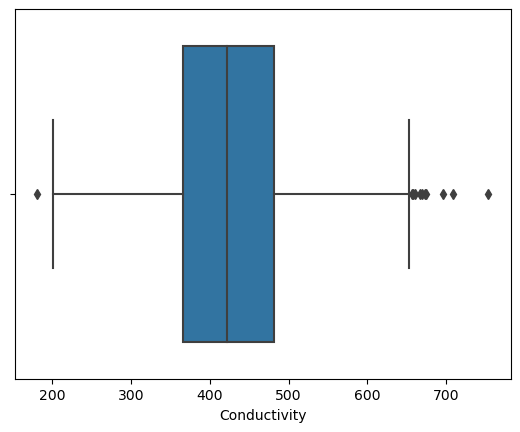

In [31]:
sns.boxplot(Data.Conductivity)

In [32]:
q1 = Data['Conductivity'].quantile(0.25)
q3 = Data['Conductivity'].quantile(0.75)
iqr = q3-q1 #Interquartile range
low_limit = q1-1.5*iqr #acceptable range
upper_limit = q3+1.5*iqr #acceptable range

In [33]:
Data['Conductivity']=np.where(Data['Conductivity'] > upper_limit,upper_limit,Data['Conductivity']) # upper limit

In [34]:
Data['Conductivity']=np.where(Data['Conductivity'] < low_limit,low_limit,Data['Conductivity']) # low_limit

<AxesSubplot:xlabel='Conductivity'>

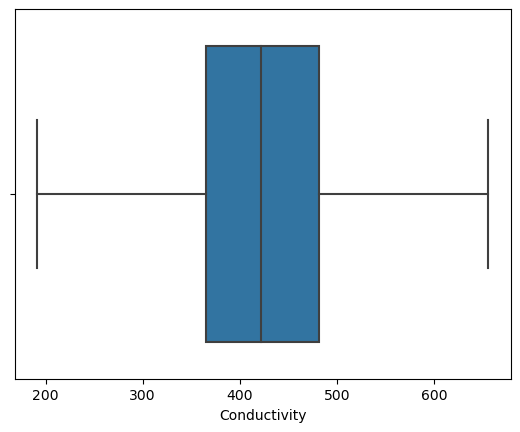

In [35]:
sns.boxplot(Data.Conductivity)

<AxesSubplot:xlabel='Organic_carbon'>

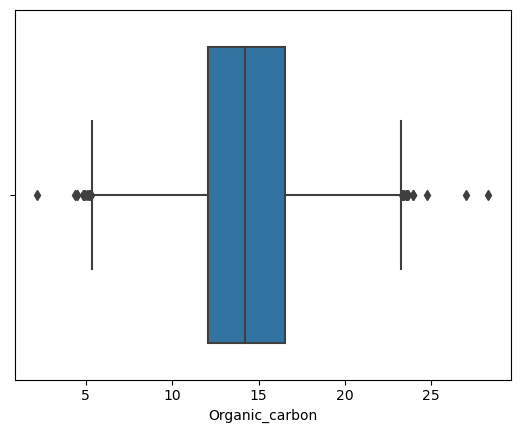

In [36]:
sns.boxplot(Data.Organic_carbon)

In [37]:
q1 = Data['Organic_carbon'].quantile(0.25)
q3 = Data['Organic_carbon'].quantile(0.75)
iqr = q3-q1 #Interquartile range
low_limit = q1-1.5*iqr #acceptable range
upper_limit = q3+1.5*iqr #acceptable range

In [38]:
Data['Organic_carbon']=np.where(Data['Organic_carbon'] > upper_limit,upper_limit,Data['Organic_carbon']) # upper limit

In [39]:
Data['Organic_carbon']=np.where(Data['Organic_carbon'] < low_limit,low_limit,Data['Organic_carbon']) # low_limit

<AxesSubplot:xlabel='Organic_carbon'>

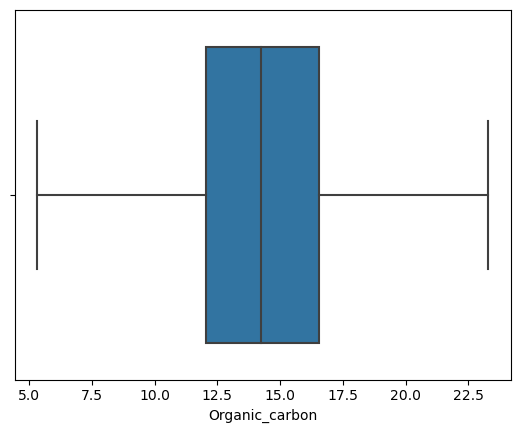

In [40]:
sns.boxplot(Data.Organic_carbon)

<AxesSubplot:xlabel='Trihalomethanes'>

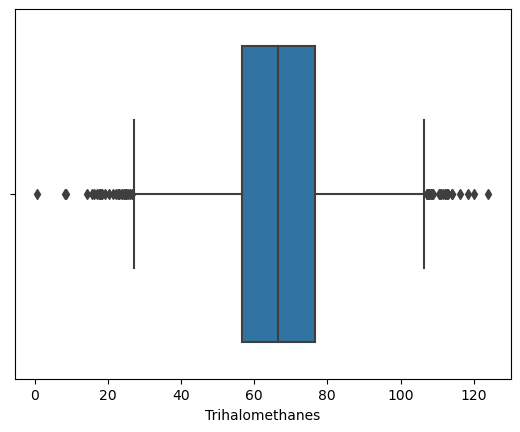

In [41]:
sns.boxplot(Data.Trihalomethanes)

In [42]:
q1 = Data['Trihalomethanes'].quantile(0.25)
q3 = Data['Trihalomethanes'].quantile(0.75)
iqr = q3-q1 #Interquartile range
low_limit = q1-1.5*iqr #acceptable range
upper_limit = q3+1.5*iqr #acceptable range

In [43]:
Data['Trihalomethanes']=np.where(Data['Trihalomethanes'] > upper_limit,upper_limit,Data['Trihalomethanes']) # upper limit

In [44]:
Data['Trihalomethanes']=np.where(Data['Trihalomethanes'] < low_limit,low_limit,Data['Trihalomethanes']) # low_limit

<AxesSubplot:xlabel='Trihalomethanes'>

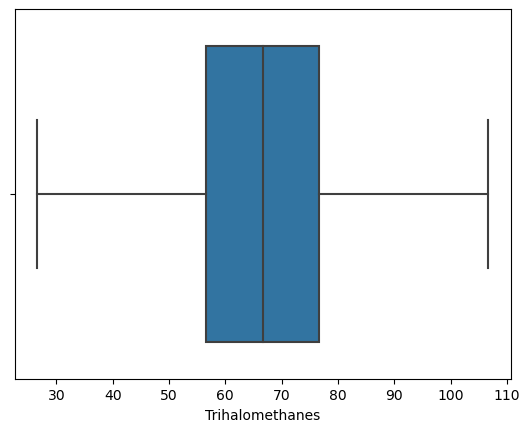

In [45]:
sns.boxplot(Data.Trihalomethanes)

<AxesSubplot:xlabel='Turbidity'>

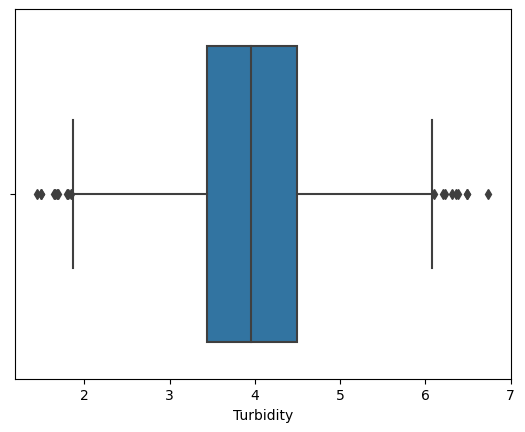

In [46]:
sns.boxplot(Data.Turbidity)

In [47]:
q1 = Data['Turbidity'].quantile(0.25)
q3 = Data['Turbidity'].quantile(0.75)
iqr = q3-q1 #Interquartile range
low_limit = q1-1.5*iqr #acceptable range
upper_limit = q3+1.5*iqr #acceptable range

In [48]:
Data['Turbidity']=np.where(Data['Turbidity'] > upper_limit,upper_limit,Data['Turbidity']) # upper limit

In [49]:
Data['Turbidity']=np.where(Data['Turbidity'] < low_limit,low_limit,Data['Turbidity']) # low_limit

<AxesSubplot:xlabel='Turbidity'>

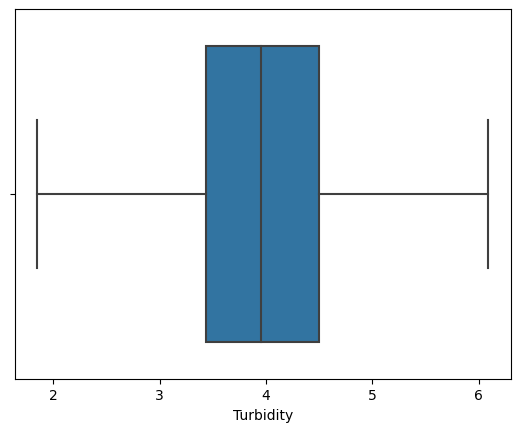

In [50]:
sns.boxplot(Data.Turbidity)

In [51]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               3276 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          3276 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3276 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   object 
dtypes: float64(9), object(1)
memory usage: 256.1+ KB


In [53]:
Data.select_dtypes(include=[np.number]).columns.tolist()

['ph',
 'Hardness',
 'Solids',
 'Chloramines',
 'Sulfate',
 'Conductivity',
 'Organic_carbon',
 'Trihalomethanes',
 'Turbidity']

In [55]:
Quantitative_Variable = Data[Data.select_dtypes(include=[np.number]).columns.tolist()]
Quantitative_Variable.head(3)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,7.036752,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135
1,3.889107,129.422921,18630.05786,6.635246,333.073546,592.885359,15.180013,56.329076,4.500656
2,8.099124,224.236259,19909.54173,9.275884,333.073546,418.606213,16.868637,66.420093,3.055934


In [56]:
Qualitative_Variable = Data[Data.select_dtypes(include=['object']).columns.tolist()]
Qualitative_Variable.head(3)

,Potability
0,not potable
1,not potable
2,not potable


In [57]:
from sklearn.preprocessing import LabelEncoder
Qualitative_Variable=Qualitative_Variable.apply(LabelEncoder().fit_transform) # label in ascending order
Qualitative_Variable.head()

,Potability
0,0
1,0
2,0
3,0
4,0


In [58]:
Final_combined = pd.concat([Qualitative_Variable, Quantitative_Variable],axis=1)
Final_combined.head()

,Potability,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,0,7.036752,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135
1,0,3.889107,129.422921,18630.05786,6.635246,333.073546,592.885359,15.180013,56.329076,4.500656
2,0,8.099124,224.236259,19909.54173,9.275884,333.073546,418.606213,16.868637,66.420093,3.055934
3,0,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771
4,0,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075


In [59]:
from sklearn.model_selection import train_test_split

# define our input variable (X) & output variable
X = Final_combined.drop('Potability', axis = 1)
Y = Final_combined[['Potability']]
# Split X and y into X_
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=60)

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
output=logreg.fit(X_train, y_train) # model

In [61]:
output.intercept_  # beto 

array([-0.00056658])

In [62]:
output.coef_  # Beta 1 -- 

array([[-7.10505094e-03, -7.36773351e-04,  5.84262003e-06,
         1.91914635e-02, -9.49137289e-04, -8.61782604e-05,
        -1.93461693e-02,  1.97247526e-03, -1.96331792e-03]])

In [63]:
output.feature_names_in_

array(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate',
       'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity'],
      dtype=object)

In [64]:
train=pd.concat([X_train,y_train],axis=1)
train.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
785,5.140801,209.358561,21407.61429,4.415976,267.157960,378.897190,5.328026,86.737223,4.192257,1
170,8.293720,206.160415,35216.38597,6.441000,347.062241,399.483621,16.065668,79.954511,3.954715,0
742,7.678967,205.479918,7472.50648,7.181869,333.073546,395.235784,7.918150,76.378309,3.718982,1
2113,6.519848,183.225998,14284.64792,8.389078,373.091575,495.417954,11.638475,58.661649,3.272286,0
2930,9.764658,119.164010,38781.45742,9.334632,380.230634,512.331846,14.967733,59.193176,3.024571,0


In [65]:
train['Predicted']=output.predict(X_train)
train.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability,Predicted
785,5.140801,209.358561,21407.61429,4.415976,267.157960,378.897190,5.328026,86.737223,4.192257,1,0
170,8.293720,206.160415,35216.38597,6.441000,347.062241,399.483621,16.065668,79.954511,3.954715,0,0
742,7.678967,205.479918,7472.50648,7.181869,333.073546,395.235784,7.918150,76.378309,3.718982,1,0
2113,6.519848,183.225998,14284.64792,8.389078,373.091575,495.417954,11.638475,58.661649,3.272286,0,0
2930,9.764658,119.164010,38781.45742,9.334632,380.230634,512.331846,14.967733,59.193176,3.024571,0,0


In [66]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(train['Predicted'], train['Potability'])
matrix

array([[1593, 1027],
       [   0,    0]], dtype=int64)

In [74]:
Accuracy_Train=(1593/(2620)*100)
print(Accuracy_Train)

60.80152671755725


In [68]:
from sklearn.metrics import classification_report
print(classification_report(train['Potability'],train['Predicted']))

              precision    recall  f1-score   support

           0       0.61      1.00      0.76      1593
           1       0.00      0.00      0.00      1027

    accuracy                           0.61      2620
   macro avg       0.30      0.50      0.38      2620
weighted avg       0.37      0.61      0.46      2620



In [69]:
test=pd.concat([X_test,y_test],axis=1)
test.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
1899,6.879405,214.731887,20509.331960,9.035250,321.383278,306.784302,12.477303,79.692080,4.700470,1
2928,3.889107,221.204114,31145.110740,7.615583,333.677843,439.112765,21.145954,66.622485,2.533996,0
925,7.602121,199.353165,11346.143450,6.900380,304.966488,210.319182,17.925782,62.846673,3.698875,0
1622,7.213375,213.767176,27377.699780,6.915301,327.717408,457.511587,17.968736,66.622485,3.453439,1
1974,6.549125,194.276857,7412.798059,5.836980,354.821194,361.037238,11.672190,57.316977,4.421059,1


In [70]:
test['Predicted']=output.predict(X_test)
test.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability,Predicted
1899,6.879405,214.731887,20509.331960,9.035250,321.383278,306.784302,12.477303,79.692080,4.700470,1,0
2928,3.889107,221.204114,31145.110740,7.615583,333.677843,439.112765,21.145954,66.622485,2.533996,0,0
925,7.602121,199.353165,11346.143450,6.900380,304.966488,210.319182,17.925782,62.846673,3.698875,0,0
1622,7.213375,213.767176,27377.699780,6.915301,327.717408,457.511587,17.968736,66.622485,3.453439,1,0
1974,6.549125,194.276857,7412.798059,5.836980,354.821194,361.037238,11.672190,57.316977,4.421059,1,0


In [71]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(test['Predicted'],test['Potability'])
print(matrix)

[[405 251]
 [  0   0]]


In [72]:
Accuracy_test=(405/(656)*100)
Accuracy_test

61.737804878048784

In [75]:
from sklearn.metrics import classification_report
print(classification_report(test['Potability'],test['Predicted']))

              precision    recall  f1-score   support

           0       0.62      1.00      0.76       405
           1       0.00      0.00      0.00       251

    accuracy                           0.62       656
   macro avg       0.31      0.50      0.38       656
weighted avg       0.38      0.62      0.47       656



In [76]:
Model_Values=pd.DataFrame(output.intercept_,index=['Intercept'],columns=['Coefficient'])
Model_Values

,Coefficient
Intercept,-0.000567


In [77]:
abc=pd.DataFrame(output.coef_.T,index=output.feature_names_in_,columns=['Coefficient'])
abc

,Coefficient
ph,-0.007105
Hardness,-0.000737
Solids,0.000006
Chloramines,0.019191
Sulfate,-0.000949
Conductivity,-0.000086
Organic_carbon,-0.019346
Trihalomethanes,0.001972
Turbidity,-0.001963


In [78]:
Model_Values.append(abc)

,Coefficient
Intercept,-0.000567
ph,-0.007105
Hardness,-0.000737
Solids,0.000006
Chloramines,0.019191
Sulfate,-0.000949
Conductivity,-0.000086
Organic_carbon,-0.019346
Trihalomethanes,0.001972
Turbidity,-0.001963
